In [62]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve

In [2]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("C:/Users/Rounak Pyne Study/Desktop/Heart/heart.csv")
data.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Column description 
- **Data Content**
- Age: Age of the patient
- Sex: Sex of the patient
- exang: exercise induced angina (1 = yes; 0 = no)
- ca: number of major vessels (0-3)
- cp: Chest Pain type chest pain type
- - Value 1: typical angina
- - Value 2: atypical angina
- - Value 3: non-anginal pain
- - Value 4: asymptomatic
- trtbps: resting blood pressure (in mm Hg)
- chol: cholestoral in mg/dl fetched via BMI sensor
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- rest_ecg: resting electrocardiographic results
- - Value 0: normal
- - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach: maximum heart rate achieved
- target: 0= less chance of heart attack 1= more chance of heart attack

In [4]:
# Removing Duplicates
print("Shape of the data before removing duplicates",data.shape)
data = data.drop_duplicates()
print("Shape of the data after removing duplicates",data.shape)

Shape of the data before removing duplicates (303, 14)
Shape of the data after removing duplicates (302, 14)


# Defining the problem statement: 
**------------------------------------------------------------------------**

#### Create a Predictive model which can tell if a person will have a heart attack or not?

**Target variable : output**
**------------------------------------------------------------------------**

* 0 = less chance of heart attack
* 1= more chance of heart attack

# Determining the type of Machine Learning
Based on the problem statement you can understand that we need to create a supervised ML classification model, as the target variable is categorical.

Text(0.5, 1.0, 'Chance of a heart attack')

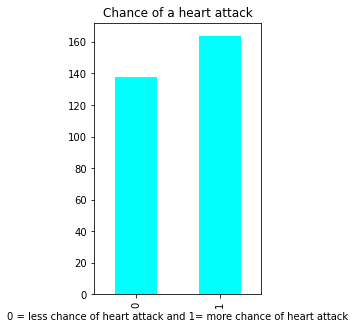

In [5]:
# Creating Bar chart as the Target variable is Categorical
group_data = data.groupby("output").size()
group_data.plot(kind = "bar", color = "cyan", figsize = (3,5))
plt.xlabel("0 = less chance of heart attack and 1= more chance of heart attack")
plt.title("Chance of a heart attack")

In [6]:
# basic data exploration.
data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [7]:
data.describe(include="all")

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
data.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

###                                                        Basic Data Exploration Results

**------------------------------------------------------------------------------------------**

**Practical Threshold for 'n' no of unique values: >20 is Continious and <20 is Categorical**

* Age - Continious
* sex - Categorical 
* trtbps - Continious
* chol - Continious
* fbs - Categorical
* restecg - Categorical
* thalachh - Continious
* exng - Categorical
* oldpeak - Continious
* slp - Categorical
* caa - Categorical
* thall - Categorical
* output - Categorical

In [109]:
# Defing Categorical and Continious columns
Cat_cols = ['sex','cp','fbs','restecg','exng','slp','caa','thall','output']
Cont_cols = ['age','trtbps','chol','thalachh','oldpeak']

In [24]:
# Checking for null values
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

# Exploratory data analysis

- **Visual Analysis**
* Continious - Histogram
* Categorical - Bar plot

In [108]:
Catcolsdf = data[Cat_cols]
Catcolsdf.head()

,sex,fbs,restecg,exng,slp,caa,thall,output,cp
0,1,1,0,0,0,0,1,1,3
1,1,0,1,0,0,0,2,1,2
2,0,0,0,0,2,0,2,1,1
3,1,0,1,0,2,0,2,1,1
4,0,0,1,1,2,0,2,1,0


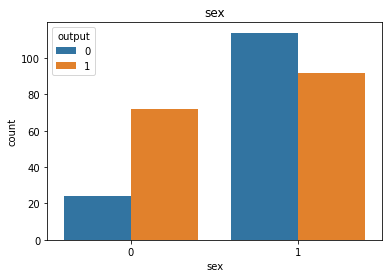

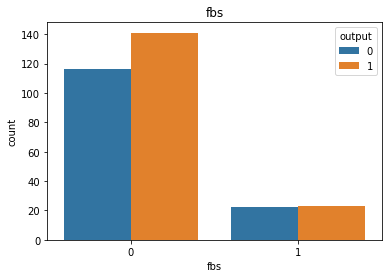

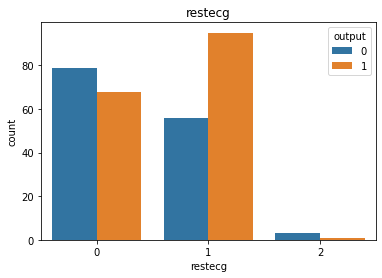

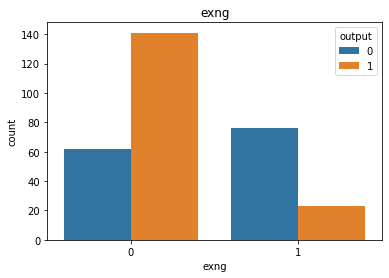

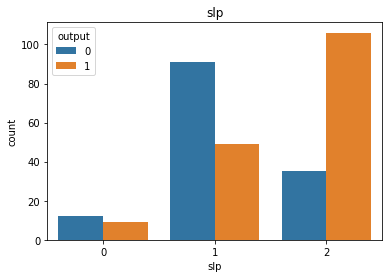

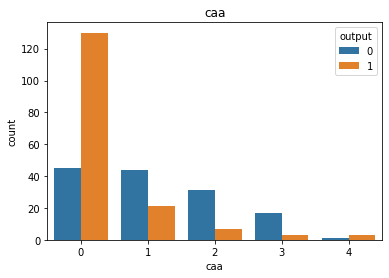

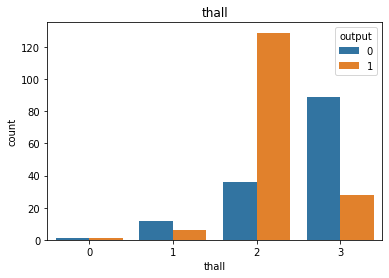

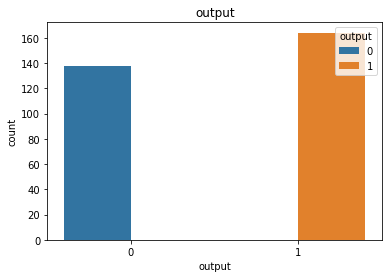

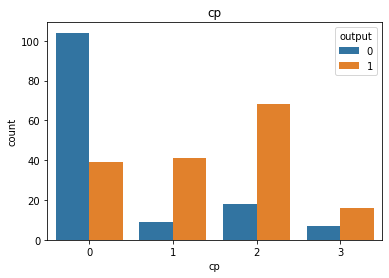

In [58]:
for i in Cat_cols:
    plt.figure()
    sns.countplot(x = i, data=Catcolsdf,hue='output')
    plt.title(i)

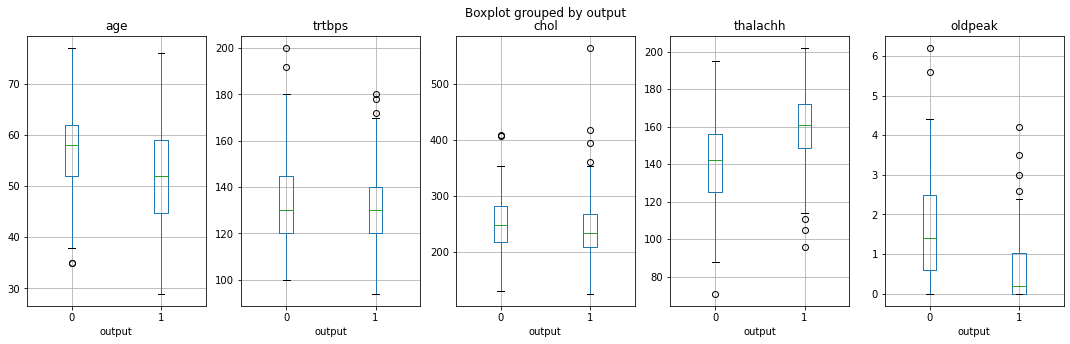

In [65]:
# Box plots for Categorical Target Variable "Survived" and continuous predictors
import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(Cont_cols), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "Survived"
for PredictorCol , i in zip(Cont_cols, range(len(Cont_cols))):
    data.boxplot(column=PredictorCol, by='output', figsize=(5,5), vert=True, ax=PlotCanvas[i])

In [71]:
# Saving this final data for reference during deployment
data.to_pickle('DataForML.pkl')

In [87]:
# outlier treatment
for i in numeric_cols:
    Q1 = np.percentile(data.loc[:,i],25)
    Q3 = np.percentile(data.loc[:,i],75)
    IQR = Q3-Q1
    print("Old shape: ", data.loc[:, i].shape)
    upper = np.where(data.loc[:, i] >= (Q3 +2.5*IQR))
    lower = np.where(data.loc[:, i] <= (Q1 - 2.5*IQR))
    try:
        data.drop(upper[0], inplace = True)
    except: print("KeyError: {} not found in axis".format(upper[0]))
    
    try:
        data.drop(lower[0], inplace = True)
    except:  print("KeyError: {} not found in axis".format(lower[0]))
    
    print("New shape: ", data.shape)

Old shape:  (302,)
New shape:  (302, 14)
Old shape:  (302,)
New shape:  (300, 14)
Old shape:  (300,)
New shape:  (299, 14)
Old shape:  (299,)
New shape:  (299, 14)
Old shape:  (299,)
New shape:  (297, 14)
Old shape:  (297,)
New shape:  (297, 14)


In [140]:
new_data_core = data.copy()
new_data_core.shape

(297, 14)

In [141]:
new_data = pd.get_dummies(new_data_core, columns = Cat_cols[:-1], drop_first = True)
new_data.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_1,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [112]:
X = new_data.drop(["output"], axis = 1)
y = new_data[["output"]]

In [113]:
X.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [105]:
y.head()

,output_1
0,1
1,1
2,1
3,1
4,1


In [114]:
scaler = StandardScaler()
scaler

StandardScaler()

In [116]:
X[Cont_cols[:-1]] = scaler.fit_transform(X[Cont_cols[:-1]])
X.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,0.962752,0.770492,-0.250803,0.014010,2.3,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.918787,-0.084651,0.098619,1.634550,3.5,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.475473,-0.084651,-0.846877,0.977574,1.4,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.186953,-0.654746,-0.189141,1.240365,0.8,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.297781,-0.654746,2.236262,0.583389,0.6,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 3)
print("X_train: {}".format(X_train.shape))
print("X_test: {}".format(X_test.shape))
print("y_train: {}".format(y_train.shape))
print("y_test: {}".format(y_test.shape))

X_train: (267, 22)
X_test: (30, 22)
y_train: (267, 1)
y_test: (30, 1)


In [119]:
logreg = LogisticRegression(C=5,penalty='l2', solver='newton-cg')
logreg

LogisticRegression(C=5, solver='newton-cg')

In [157]:
log =logreg.fit(X_train, y_train)

In [158]:
prediction = log.predict(X_test)

In [179]:
# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(prediction, y_test))

F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,))

from sklearn.model_selection import cross_val_score

Accuracy_Values_Logistic=cross_val_score(logreg.fit(X_train, y_train), X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values_Logistic)
print('\nFinal Average Accuracy of the model:', str(round(round(Accuracy_Values_Logistic.mean(),2) * 100)) + '%')

              precision    recall  f1-score   support

           0       1.00      0.50      0.67        12
           1       0.75      1.00      0.86        18

    accuracy                           0.80        30
   macro avg       0.88      0.75      0.76        30
weighted avg       0.85      0.80      0.78        30

[[ 6  0]
 [ 6 18]]
Accuracy of the model on Testing Sample Data: 1

Accuracy values for 10-fold Cross Validation:
 [0.89753231 0.89942857 0.83238095 0.93333333 0.86666667 0.86666667
 0.8        0.93103448 0.71438523 0.82675026]

Final Average Accuracy of the model: 86%


In [174]:
# Dtree
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=5,criterion='entropy')

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

Accuracy_Values_Dtree=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values_Dtree)
print('\nFinal Average Accuracy of the model:', str(round(round(Accuracy_Values_Dtree.mean(),2)*100))+ '%')

              precision    recall  f1-score   support

           0       1.00      0.50      0.67        12
           1       0.75      1.00      0.86        18

    accuracy                           0.80        30
   macro avg       0.88      0.75      0.76        30
weighted avg       0.85      0.80      0.78        30

[[ 6  6]
 [ 0 18]]
Accuracy of the model on Testing Sample Data: 0.78

Accuracy values for 10-fold Cross Validation:
 [0.83238095 0.73333333 0.79722222 0.83277217 0.83351872 0.86666667
 0.69485714 0.74619447 0.79056795 0.78578892]

Final Average Accuracy of the model: 79%


In [180]:
# Final Accuracy of the Dtree and Logistic is 
logistic = round(Accuracy_Values_Logistic.mean(),2)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values_Logistic.mean(),2))
percentage = str(round(logistic*100)) + '%' 
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values_Dtree.mean(),2))
Dtree = round(Accuracy_Values_Dtree.mean(),2)
print("We will choose the model with highest accuracy which is Logistic regression with a accuracy of:", percentage)


Final Average Accuracy of the model: 0.86

Final Average Accuracy of the model: 0.79
We will choose the model with highest accuracy which is Logistic regression with a accuracy of: 86%
